# Produktanalyse

## Imports

In [61]:
import pandas as pd
import pyspark
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotnine import *
from plotly.tools import mpl_to_plotly as ggplotly
import plotly.express as px

## Vorverarbeitung

In [81]:
spark = pyspark.sql.SparkSession.builder.appName("app1").getOrCreate()
sdf = spark.read.csv("data/test_data.csv", header=True, inferSchema=True)
# sdf.printSchema()
# sdf.show()


In [86]:
sdf = sdf.withColumn("category_class", pyspark.sql.functions.substring_index(sdf.category_code, '.', 1))
sdf = sdf.fillna(value="unknown")
sdf.createOrReplaceTempView("Product_Data")
pdf = sdf.toPandas()

## Analysen

In [87]:
spark.sql("SELECT *  from Product_Data").show()

+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+--------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|category_class|
+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+--------------+
|2019-11-01 00:00:...|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|   electronics|
|2019-11-01 00:00:...|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...|    appliances|
|2019-11-01 00:00:...|      view|  17302664|2053013553853497655|             unknown|   creed| 28.31|561587266|755422e7-9040-477...|       unknown|
|2019-11-01 00:00:...|      view|   3601530|2053013563810775923|appliances.kitche...|      lg|712.87|518085591|3

In [7]:
spark.sql("SELECT COUNT(*) AS Row_Count from Product_Data").show()

+---------+
|Row_Count|
+---------+
|      217|
+---------+



### Einzelbetrachtung

#### Product_ID

In [31]:
spark.sql("SELECT COUNT(DISTINCT(product_id)) AS Count_Unique_Product_ID from Product_Data").show()

+-----------------------+
|Count_Unique_Product_ID|
+-----------------------+
|                    188|
+-----------------------+



In [35]:
spark.sql("SELECT DISTINCT(product_id) AS Product_ID, COUNT(product_id) AS Count from Product_Data GROUP BY product_id ORDER BY Count DESC").show()

+----------+-----+
|Product_ID|Count|
+----------+-----+
|  13200605|    3|
|   5701331|    3|
|  24400437|    3|
|  12708937|    3|
|   4100297|    2|
|   1005161|    2|
|   1004856|    2|
|   1005116|    2|
|   5000088|    2|
|   1004775|    2|
|  21408240|    2|
|   1004237|    2|
|   4804295|    2|
|  38900011|    2|
|  16700826|    2|
|   1004258|    2|
|   1307115|    2|
|  17300072|    2|
|   4600603|    2|
|  29900072|    2|
+----------+-----+
only showing top 20 rows



In [117]:
px.histogram(pdf, x='product_id')

#### Category_ID

In [36]:
spark.sql("SELECT COUNT(DISTINCT(category_id)) AS Count_Unique_Category_ID from Product_Data").show()

+------------------------+
|Count_Unique_Category_ID|
+------------------------+
|                      74|
+------------------------+



In [65]:
spark.sql("SELECT DISTINCT(category_id) AS Category_ID, COUNT(product_id) AS Count from Product_Data GROUP BY category_id ORDER BY Count DESC").show()

+-------------------+-----+
|        Category_ID|Count|
+-------------------+-----+
|2053013555631882655|   38|
|2053013558920217191|   18|
|2053013553559896355|   12|
|2053013553853497655|    9|
|2053013559901684381|    6|
|2053013556168753601|    6|
|2053013561579406073|    6|
|2053013553970938175|    5|
|2053013563911439225|    5|
|2053013554658804075|    5|
|2053013553945772349|    4|
|2053013563944993659|    4|
|2053013556311359947|    4|
|2090228413959766319|    4|
|2053013563215184719|    4|
|2053013563651392361|    4|
|2053013557024391671|    3|
|2100825583029060150|    3|
|2053013557192163841|    3|
|2060981320581906480|    2|
+-------------------+-----+
only showing top 20 rows



In [115]:
px.histogram(pdf, x="category_id")

#### Category_Code

In [38]:
spark.sql("SELECT COUNT(DISTINCT(category_code)) AS Count_Unique_Category_Code from Product_Data").show()

+--------------------------+
|Count_Unique_Category_Code|
+--------------------------+
|                        34|
+--------------------------+



In [64]:
spark.sql("SELECT DISTINCT(category_code) AS Category_Code, COUNT(product_id) AS Count from Product_Data GROUP BY category_code ORDER BY Count DESC").show()

+--------------------+-----+
|       Category_Code|Count|
+--------------------+-----+
|                null|   87|
|electronics.smart...|   38|
|  computers.notebook|   18|
|  electronics.clocks|    8|
|furniture.kitchen...|    6|
|appliances.kitche...|    5|
|auto.accessories....|    5|
|electronics.audio...|    5|
|furniture.bedroom...|    4|
|appliances.kitche...|    4|
|construction.tool...|    4|
|electronics.audio...|    4|
|       apparel.jeans|    3|
|computers.periphe...|    2|
|furniture.living_...|    2|
|appliances.sewing...|    2|
|auto.accessories....|    2|
|electronics.camer...|    1|
|furniture.bathroo...|    1|
|construction.tool...|    1|
+--------------------+-----+
only showing top 20 rows



In [114]:
px.histogram(pdf, x="category_code")

#### Category_class

In [60]:
spark.sql("SELECT COUNT(DISTINCT(category_class)) AS Count_Unique_Category_Class from Product_Data").show()

+---------------------------+
|Count_Unique_Category_Class|
+---------------------------+
|                          8|
+---------------------------+



In [62]:
spark.sql("SELECT DISTINCT(category_class) AS Category_Class, COUNT(product_id) AS Count from Product_Data GROUP BY category_class ORDER BY Count DESC").show()

+--------------+-----+
|Category_Class|Count|
+--------------+-----+
|          null|   87|
|   electronics|   57|
|     computers|   23|
|     furniture|   14|
|    appliances|   14|
|  construction|    8|
|          auto|    7|
|       apparel|    6|
|   accessories|    1|
+--------------+-----+



In [113]:
px.histogram(pdf, x="category_class")

#### Brand

In [40]:
spark.sql("SELECT COUNT(DISTINCT(brand)) AS Count_Unique_Brand from Product_Data").show()

+------------------+
|Count_Unique_Brand|
+------------------+
|                85|
+------------------+



In [63]:
spark.sql("SELECT DISTINCT(brand) AS Brand, COUNT(product_id) AS Count from Product_Data GROUP BY brand ORDER BY Count DESC").show()

+---------+-----+
|    Brand|Count|
+---------+-----+
|     null|   41|
|    apple|   16|
|   xiaomi|   15|
|  samsung|   10|
|       hp|    9|
|   huawei|    6|
|   tissot|    4|
| kirkland|    4|
|      brw|    4|
|      ams|    3|
|   dewalt|    3|
|    bosch|    3|
|trussardi|    3|
|    canon|    3|
|     asus|    3|
| michelin|    3|
|     acer|    3|
|  lucente|    3|
|     acme|    2|
|     peda|    2|
+---------+-----+
only showing top 20 rows



In [112]:
px.histogram(pdf, x="brand")

#### Price

In [81]:
spark.sql("SELECT COUNT(DISTINCT(price)) AS Count_Unique_Price, MAX(price) AS MAX, MEAN(price) AS MEAN, MIN(price) AS MIN from Product_Data").show()

+------------------+-------+-----------------+----+
|Count_Unique_Price|    MAX|             MEAN| MIN|
+------------------+-------+-----------------+----+
|               185|2496.59|306.6343778801842|1.09|
+------------------+-------+-----------------+----+



In [111]:
px.box(pdf, y="price")

### Kombibetrachtung

#### Overview Counts

In [77]:
spark.sql("SELECT COUNT(*) AS Row_Count, COUNT(DISTINCT(product_id)) AS Product_ID, COUNT(DISTINCT(category_class)) AS Category_Class, COUNT(DISTINCT(category_code)) AS Category_Code, COUNT(DISTINCT(category_id)) AS Category_ID, COUNT(DISTINCT(brand)) AS Brand, COUNT(DISTINCT(price)) AS Price from Product_Data").show()

+---------+----------+--------------+-------------+-----------+-----+-----+
|Row_Count|Product_ID|Category_Class|Category_Code|Category_ID|Brand|Price|
+---------+----------+--------------+-------------+-----------+-----+-----+
|      217|       188|             8|           34|         74|   85|  185|
+---------+----------+--------------+-------------+-----------+-----+-----+



#### Preis-Verteilung

##### Product_ID - Price

In [78]:
spark.sql("SELECT Product_ID, Price from Product_Data ORDER BY Price Desc").show()

+----------+-------+
|Product_ID|  Price|
+----------+-------+
|   1305977|2496.59|
|   1307012|2342.15|
|   1306571| 2312.8|
|   1304315|2311.49|
|   5100797|2239.44|
|  15100252|1335.43|
|   1307519|1209.55|
|   1004241| 1173.6|
|   1004237|1091.33|
|   1004237|1091.33|
|   1005116|1013.86|
|   1005116|1013.86|
|   1005115| 949.47|
|   1004840| 946.73|
|   1003316| 928.38|
|   1003316| 928.38|
|   1003317| 928.18|
|  29900072| 900.92|
|  29900072| 900.92|
|  21406939| 895.78|
+----------+-------+
only showing top 20 rows



In [109]:
px.scatter(pdf, x="product_id", y="price")px.box(pdf, x="category_code", y="price")

##### Category Class - Price

In [82]:
spark.sql("SELECT Category_class, COUNT(DISTINCT(price)) AS Count_Unique_Price, MAX(price) AS MAX, MEAN(price) AS MEAN, MIN(price) AS MIN from Product_Data GROUP BY Category_class ORDER BY MEAN DESC").show()

+--------------+------------------+-------+------------------+------+
|Category_class|Count_Unique_Price|    MAX|              MEAN|   MIN|
+--------------+------------------+-------+------------------+------+
|     computers|                21|2496.59| 760.9530434782608| 51.46|
|   electronics|                46|2239.44|  446.769298245614|  22.8|
|    appliances|                12| 712.87|341.70214285714286| 32.66|
|     furniture|                10| 591.78|241.24142857142854| 31.64|
|          auto|                 5| 229.09|192.08428571428573|113.93|
|          null|                77|1335.43| 147.3947126436782|  1.09|
|  construction|                 8| 254.78|110.10125000000002| 24.71|
|       apparel|                 6| 102.71| 52.25166666666666|  8.73|
|   accessories|                 1|  48.43|             48.43| 48.43|
+--------------+------------------+-------+------------------+------+



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning:

invalid value encountered in reduce

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning:

invalid value encountered in reduce

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning:

stat_boxplot : Removed 87 rows containing non-finite values.



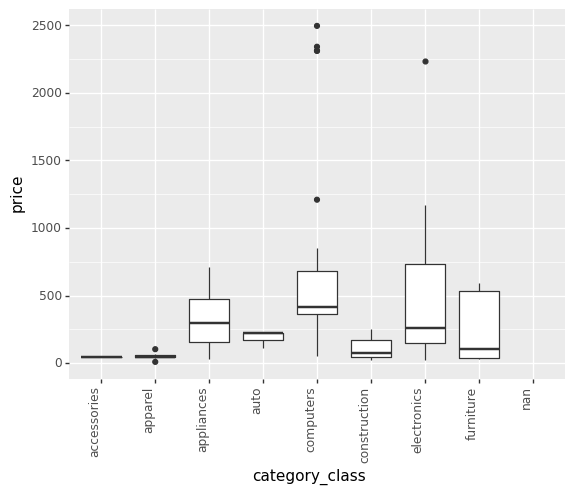

<ggplot: (92922014178)>

In [54]:
(
   ggplot(pdf)  
    + aes(x="category_class", y="price") 
    + geom_boxplot()
    + theme(axis_text_x = element_text(angle=90, hjust=1))
)

In [105]:
px.box(pdf, x="category_class", y="price")

##### Cateogory Code - Price

In [83]:
spark.sql("SELECT Category_code, COUNT(DISTINCT(price)) AS Count_Unique_Price, MAX(price) AS MAX, MEAN(price) AS MEAN, MIN(price) AS MIN from Product_Data GROUP BY Category_code ORDER BY MEAN DESC").show()

+--------------------+------------------+-------+------------------+------+
|       Category_code|Count_Unique_Price|    MAX|              MEAN|   MIN|
+--------------------+------------------+-------+------------------+------+
|  computers.notebook|                16|2496.59| 924.2788888888889|360.09|
|  electronics.clocks|                 7|2239.44|          781.1975|165.26|
|appliances.kitche...|                 1| 712.87|            712.87|712.87|
|appliances.kitche...|                 3| 684.44|          519.7175|298.16|
|furniture.living_...|                 2| 591.78|           514.555|437.33|
|electronics.smart...|                29| 1173.6| 474.5957894736842| 84.65|
|furniture.bedroom...|                 2|  566.3|           458.825| 136.4|
|electronics.camer...|                 1| 386.08|            386.08|386.08|
|appliances.sewing...|                 1| 293.65|            293.65|293.65|
|electronics.video.tv|                 1| 289.33|            289.33|289.33|
|computers.c

In [104]:
px.box(pdf, x="category_code", y="price")

##### Category ID - Price

In [85]:
spark.sql("SELECT Category_id, COUNT(DISTINCT(price)) AS Count_Unique_Price, MAX(price) AS MAX, MEAN(price) AS MEAN, MIN(price) AS MIN from Product_Data GROUP BY Category_id ORDER BY MEAN DESC").show()

+-------------------+------------------+-------+-----------------+------+
|        Category_id|Count_Unique_Price|    MAX|             MEAN|   MIN|
+-------------------+------------------+-------+-----------------+------+
|2053013553341792533|                 2|2239.44|          1395.79|552.14|
|2053013558920217191|                16|2496.59|924.2788888888889|360.09|
|2059484601444729123|                 1| 900.92|           900.92|900.92|
|2055156924315337497|                 1| 733.61|           733.61|733.61|
|2053013563810775923|                 1| 712.87|           712.87|712.87|
|2053013557024391671|                 3|1335.43|           656.98|257.15|
|2053013561579406073|                 5| 895.78|576.3333333333334|165.26|
|2053013557192163841|                 1|  566.3|            566.3| 566.3|
|2053013563944993659|                 3| 684.44|519.7175000000001|298.16|
|2053013559792632471|                 2| 591.78|          514.555|437.33|
|2053013561218695907|                 

In [103]:
px.box(pdf, x="category_id", y="price")

##### Brand - Price

In [86]:
spark.sql("SELECT brand, COUNT(DISTINCT(price)) AS Count_Unique_Price, MAX(price) AS MAX, MEAN(price) AS MEAN, MIN(price) AS MIN from Product_Data GROUP BY brand ORDER BY MEAN DESC").show()

+---------------+------------------+-------+------------------+-------+
|          brand|Count_Unique_Price|    MAX|              MEAN|    MIN|
+---------------+------------------+-------+------------------+-------+
|         garmin|                 1|2239.44|           2239.44|2239.44|
|           acer|                 3| 2312.8|1345.7133333333334| 514.79|
|          apple|                12|2496.59|        1171.44875| 458.28|
|           peda|                 1| 900.92|            900.92| 900.92|
|harley-davidson|                 1| 751.63|            751.63| 751.63|
|         tissot|                 3| 895.78|           749.825| 380.96|
|     humminbird|                 1| 733.61|            733.61| 733.61|
|             lg|                 1| 712.87|            712.87| 712.87|
|           sony|                 1| 511.13|            511.13| 511.13|
|           asus|                 3| 849.42|499.19666666666666| 287.83|
|          bosch|                 2| 684.44| 463.2166666666667| 

In [102]:
px.box(pdf, x="brand", y="price")

#### Category-Vergleich

##### Category Class - Category Code

In [87]:
spark.sql("SELECT Category_Class, COUNT(DISTINCT(Category_Code)) AS Count_Category_Codes from Product_Data GROUP BY Category_Class").show()

+--------------+--------------------+
|Category_Class|Count_Category_Codes|
+--------------+--------------------+
|     computers|                   5|
|          auto|                   2|
|          null|                   0|
|       apparel|                   4|
|    appliances|                   6|
|     furniture|                   5|
|   accessories|                   1|
|   electronics|                   6|
|  construction|                   5|
+--------------+--------------------+



In [97]:
spark.sql("SELECT Category_Class, Category_Code from Product_Data GROUP BY Category_Class, Category_Code ORDER BY Category_Code DESC").show()

+--------------+--------------------+
|Category_Class|       Category_Code|
+--------------+--------------------+
|     furniture|furniture.living_...|
|     furniture|furniture.kitchen...|
|     furniture|furniture.kitchen...|
|     furniture|furniture.bedroom...|
|     furniture|furniture.bathroo...|
|   electronics|electronics.video.tv|
|   electronics|electronics.smart...|
|   electronics|  electronics.clocks|
|   electronics|electronics.camer...|
|   electronics|electronics.audio...|
|   electronics|electronics.audio...|
|  construction|construction.tool...|
|  construction|construction.tool...|
|  construction|construction.tool...|
|  construction|construction.tool...|
|  construction|construction.tool...|
|     computers|computers.periphe...|
|     computers|  computers.notebook|
|     computers|   computers.desktop|
|     computers|computers.compone...|
+--------------+--------------------+
only showing top 20 rows



In [88]:
px.histogram(pdf, x="category_class", color="category_code")

Mehrere Category Codes gehören immer nur zu einer Category Class.

##### Category Class - Category ID

In [99]:
spark.sql("SELECT Category_Class, COUNT(DISTINCT(Category_ID)) AS Count_Category_ID from Product_Data GROUP BY Category_Class").show()

+--------------+-----------------+
|Category_Class|Count_Category_ID|
+--------------+-----------------+
|     computers|                5|
|          auto|                2|
|          null|               38|
|       apparel|                4|
|    appliances|                6|
|     furniture|                6|
|   accessories|                1|
|   electronics|                7|
|  construction|                5|
+--------------+-----------------+



In [102]:
spark.sql("SELECT Category_ID, COUNT(DISTINCT(Category_class)) AS Count_Category_class from Product_Data GROUP BY Category_ID ORDER BY Count_Category_class DESC").show()

+-------------------+--------------------+
|        Category_ID|Count_Category_class|
+-------------------+--------------------+
|2127425434894205468|                   1|
|2053013552326770905|                   1|
|2053013556311359947|                   1|
|2146660887346282824|                   1|
|2053013563810775923|                   1|
|2053013554155487563|                   1|
|2053013560530830019|                   1|
|2053013555631882655|                   1|
|2053013563944993659|                   1|
|2053013561579406073|                   1|
|2053013559792632471|                   1|
|2173216765583032544|                   1|
|2053013558433677895|                   1|
|2100825583029060150|                   1|
|2127425436764865054|                   1|
|2116907524572577889|                   1|
|2053013558920217191|                   1|
|2053013565983425517|                   1|
|2053013557192163841|                   1|
|2053013554415534427|                   1|
+----------

In [101]:
spark.sql("SELECT Category_Class, Category_ID from Product_Data GROUP BY Category_Class, Category_ID ORDER BY Category_Class DESC, Category_ID DESC").show()

+--------------+-------------------+
|Category_Class|        Category_ID|
+--------------+-------------------+
|     furniture|2053013559901684381|
|     furniture|2053013559792632471|
|     furniture|2053013558433677895|
|     furniture|2053013557477376525|
|     furniture|2053013557192163841|
|     furniture|2053013555464110485|
|   electronics|2053013561579406073|
|   electronics|2053013560530830019|
|   electronics|2053013555631882655|
|   electronics|2053013554658804075|
|   electronics|2053013554415534427|
|   electronics|2053013553945772349|
|   electronics|2053013553341792533|
|  construction|2144916515806248980|
|  construction|2127425436764865054|
|  construction|2127425434894205468|
|  construction|2098563450757186313|
|  construction|2053013556311359947|
|     computers|2053013559868129947|
|     computers|2053013558920217191|
+--------------+-------------------+
only showing top 20 rows



In [89]:
px.histogram(pdf, x="category_class", color="category_id")

Mehrere Category IDs gehören immer nur zur einen Category Class.

##### Category Class - Product ID

In [103]:
spark.sql("SELECT Category_Class, COUNT(DISTINCT(Product_ID)) AS Count_Product_ID from Product_Data GROUP BY Category_Class").show()

+--------------+----------------+
|Category_Class|Count_Product_ID|
+--------------+----------------+
|     computers|              22|
|          auto|               5|
|          null|              78|
|       apparel|               6|
|    appliances|              12|
|     furniture|              10|
|   accessories|               1|
|   electronics|              46|
|  construction|               8|
+--------------+----------------+



In [104]:
spark.sql("SELECT Product_ID, COUNT(DISTINCT(Category_class)) AS Count_Category_class from Product_Data GROUP BY Product_ID ORDER BY Count_Category_class DESC").show()

+----------+--------------------+
|Product_ID|Count_Category_class|
+----------+--------------------+
|   1305977|                   1|
|   6500912|                   1|
|   1004990|                   1|
|   2700598|                   1|
|   1004566|                   1|
|   1307012|                   1|
|   1005116|                   1|
|   2701517|                   1|
|   5800506|                   1|
|   1303355|                   1|
|  45601414|                   1|
|   1306894|                   1|
|   1307350|                   1|
|   4804420|                   1|
|   1004241|                   1|
|   1004237|                   1|
|  30000218|                   1|
|   5100855|                   1|
|  21406939|                   1|
|   3901174|                   1|
+----------+--------------------+
only showing top 20 rows



In [105]:
spark.sql("SELECT Category_Class, Product_ID from Product_Data GROUP BY Category_Class, Product_ID ORDER BY Category_Class DESC, Product_ID DESC").show()

+--------------+----------+
|Category_Class|Product_ID|
+--------------+----------+
|     furniture|  17200570|
|     furniture|  17200558|
|     furniture|  16900083|
|     furniture|  16700826|
|     furniture|  16700690|
|     furniture|  16700384|
|     furniture|  16700260|
|     furniture|  13600340|
|     furniture|  13200605|
|     furniture|   7100133|
|   electronics|  21408240|
|   electronics|  21407128|
|   electronics|  21406939|
|   electronics|  21405259|
|   electronics|  21400135|
|   electronics|   5801656|
|   electronics|   5801550|
|   electronics|   5801483|
|   electronics|   5800506|
|   electronics|   5100855|
+--------------+----------+
only showing top 20 rows



In [90]:
px.histogram(pdf, x="category_class", color="product_id")

Mehrere Product IDs gehören immer nur zur einen Category Class

##### Category Class - Brand

In [91]:
spark.sql("SELECT Category_Class, COUNT(DISTINCT(Brand)) AS Count_Brand from Product_Data GROUP BY Category_Class").show()

+--------------+-----------+
|Category_Class|Count_Brand|
+--------------+-----------+
|     computers|          8|
|          auto|          4|
|          null|         46|
|       apparel|          3|
|    appliances|          9|
|     furniture|          3|
|   accessories|          1|
|   electronics|         15|
|  construction|          5|
+--------------+-----------+



In [98]:
spark.sql("SELECT Brand, COUNT(DISTINCT(Category_class)) AS Count_Category_class from Product_Data GROUP BY Brand").show()

+--------+--------------------+
|   Brand|Count_Category_class|
+--------+--------------------+
|yokohama|                   0|
|goodloot|                   1|
|cordiant|                   0|
| element|                   1|
| rondell|                   0|
|   epson|                   1|
|   oasis|                   1|
|  rezult|                   0|
|   lider|                   0|
| eveline|                   0|
|   tefal|                   1|
|givenchy|                   0|
|   apple|                   2|
|  jordan|                   1|
|   casio|                   1|
|    null|                   7|
|   fubag|                   1|
|  armani|                   1|
|  kolner|                   0|
|   canon|                   1|
+--------+--------------------+
only showing top 20 rows



In [96]:
spark.sql("SELECT Category_Class, Brand from Product_Data GROUP BY Category_Class, Brand ORDER BY Category_Class DESC, Brand DESC").show()

+--------------+--------+
|Category_Class|   Brand|
+--------------+--------+
|     furniture|    nika|
|     furniture|mamadoma|
|     furniture|     brw|
|     furniture|    null|
|   electronics|  xiaomi|
|   electronics|  tissot|
|   electronics| samsung|
|   electronics| pioneer|
|   electronics|    oppo|
|   electronics|  huawei|
|   electronics|      hp|
|   electronics|  garmin|
|   electronics| element|
|   electronics|   casio|
|   electronics|  avatar|
|   electronics|  armani|
|   electronics|   apple|
|   electronics| alphard|
|   electronics|    acme|
|   electronics|    null|
+--------------+--------+
only showing top 20 rows



In [91]:
px.histogram(pdf, x="category_class", color="brand")

Mehrere Brands können zu mehreren Category Class gehören.

##### Category Code - Category ID

In [110]:
spark.sql("SELECT Category_code, COUNT(DISTINCT(Category_ID)) AS Count_Category_ID from Product_Data GROUP BY Category_code").show()

+--------------------+-----------------+
|       Category_code|Count_Category_ID|
+--------------------+-----------------+
|       apparel.shirt|                1|
|electronics.camer...|                1|
|electronics.audio...|                1|
|appliances.kitche...|                1|
|       apparel.jeans|                1|
|furniture.kitchen...|                1|
|construction.tool...|                1|
|auto.accessories....|                1|
|                null|               38|
|construction.tool...|                1|
|construction.tool...|                1|
|furniture.bathroo...|                1|
|     accessories.bag|                1|
|furniture.kitchen...|                1|
|electronics.audio...|                1|
|furniture.bedroom...|                2|
|  electronics.clocks|                2|
|      apparel.tshirt|                1|
|electronics.smart...|                1|
|construction.tool...|                1|
+--------------------+-----------------+
only showing top

In [112]:
spark.sql("SELECT Category_ID, COUNT(DISTINCT(Category_code)) AS Count_Category_code from Product_Data GROUP BY Category_ID ORDER BY Count_Category_code DESC").show()

+-------------------+-------------------+
|        Category_ID|Count_Category_code|
+-------------------+-------------------+
|2055156924407612189|                  1|
|2053013558433677895|                  1|
|2127425434894205468|                  1|
|2053013563944993659|                  1|
|2053013561579406073|                  1|
|2100825583029060150|                  1|
|2053013556311359947|                  1|
|2053013555631882655|                  1|
|2146660887346282824|                  1|
|2053013565983425517|                  1|
|2053013563810775923|                  1|
|2053013559792632471|                  1|
|2053013554155487563|                  1|
|2053013560530830019|                  1|
|2053013558920217191|                  1|
|2173216765583032544|                  1|
|2127425436764865054|                  1|
|2053013557192163841|                  1|
|2053013554415534427|                  1|
|2116907524572577889|                  1|
+-------------------+-------------

In [113]:
spark.sql("SELECT Category_code, Category_ID from Product_Data GROUP BY Category_code, Category_ID ORDER BY Category_code DESC, Category_ID DESC").show()

+--------------------+-------------------+
|       Category_code|        Category_ID|
+--------------------+-------------------+
|furniture.living_...|2053013559792632471|
|furniture.kitchen...|2053013558433677895|
|furniture.kitchen...|2053013559901684381|
|furniture.bedroom...|2053013557192163841|
|furniture.bedroom...|2053013555464110485|
|furniture.bathroo...|2053013557477376525|
|electronics.video.tv|2053013554415534427|
|electronics.smart...|2053013555631882655|
|  electronics.clocks|2053013561579406073|
|  electronics.clocks|2053013553341792533|
|electronics.camer...|2053013560530830019|
|electronics.audio...|2053013553945772349|
|electronics.audio...|2053013554658804075|
|construction.tool...|2127425436764865054|
|construction.tool...|2144916515806248980|
|construction.tool...|2127425434894205468|
|construction.tool...|2098563450757186313|
|construction.tool...|2053013556311359947|
|computers.periphe...|2053013553056579841|
|  computers.notebook|2053013558920217191|
+----------

In [92]:
px.histogram(pdf, x="category_code", color="category_id")

In [ ]:
Mehrere Category_IDs gehören immer nur zu einem Category_code.

##### Category ID - Product ID

In [107]:
spark.sql("SELECT Category_ID, COUNT(DISTINCT(Product_ID)) AS Count_Product from Product_Data GROUP BY Category_ID").show()

+-------------------+-------------+
|        Category_ID|Count_Product|
+-------------------+-------------+
|2053013563944993659|            3|
|2173216765583032544|            1|
|2053013555631882655|           29|
|2137704922018218396|            2|
|2152167773222993940|            1|
|2053013556110033341|            1|
|2053013561277416167|            1|
|2053013554415534427|            1|
|2053013562183385881|            1|
|2053013558223962683|            1|
|2053013561218695907|            1|
|2055156924315337497|            1|
|2053013559792632471|            2|
|2053013558920217191|           17|
|2127425436764865054|            1|
|2053013557192163841|            1|
|2085718636156158307|            1|
|2053013560555995845|            2|
|2079713978300236035|            2|
|2053013563651392361|            4|
+-------------------+-------------+
only showing top 20 rows



In [108]:
spark.sql("SELECT Product_ID, COUNT(DISTINCT(Category_ID)) AS Count_Category_ID from Product_Data GROUP BY Product_ID").show()

+----------+-----------------+
|Product_ID|Count_Category_ID|
+----------+-----------------+
|  24400436|                1|
|   2701517|                1|
|   5100855|                1|
|   1303355|                1|
|  17301495|                1|
|   5800506|                1|
|   1004241|                1|
|  15100252|                1|
|   1306894|                1|
|  12720155|                1|
|  22700202|                1|
|  12701967|                1|
|   4804420|                1|
|  37900026|                1|
|  12720378|                1|
|  15200565|                1|
|   1004237|                1|
|  30000218|                1|
|   3901174|                1|
|   1004566|                1|
+----------+-----------------+
only showing top 20 rows



In [115]:
spark.sql("SELECT Category_ID, Product_ID from Product_Data GROUP BY Category_ID, Product_ID ORDER BY Category_ID DESC, Product_ID DESC").show()

+-------------------+----------+
|        Category_ID|Product_ID|
+-------------------+----------+
|2173216765583032544|  57300036|
|2152167773222993940|  37900026|
|2146660887346282824|  43200121|
|2144916515806248980|  53900036|
|2137704922018218396|  52000058|
|2137704922018218396|  52000038|
|2134905044833666047|  50600085|
|2134905044833666047|  50600046|
|2127425436764865054|  30000218|
|2127425434894205468|  40900007|
|2116907524572577889|  45601414|
|2100825583029060150|  44300043|
|2100825583029060150|  44300026|
|2100825583029060150|  44300009|
|2098563450757186313|  42900023|
|2090228413959766319|  41100058|
|2090228413959766319|  41100055|
|2090228413959766319|  41100050|
|2090228413959766319|  41100033|
|2085718636156158307|  38900011|
+-------------------+----------+
only showing top 20 rows



In [93]:
px.histogram(pdf, x="category_id", color="product_id")

Mehrere Product_IDs gehören immer nur zu einer Category_ID.

Fazit: Eine Category Class vereinigt mehrere Category Codes. Diese vereinigt mehrere Category IDs und die Category IDS vereinigen wiederrum mehrere Product IDs. Die Brands hingegen verteillen sich über verschiedene Category Classes, Codes und IDS.

#### Zusammenhang mit dem Event-Type

In [119]:
spark.sql("SELECT event_type, Count(*) AS Count from Product_Data GROUP BY event_type ORDER BY Count DESC").show()

+----------+-----+
|event_type|Count|
+----------+-----+
|      view|  214|
|  purchase|    2|
|      cart|    1|
+----------+-----+



In [94]:
px.histogram(pdf, x="event_type")

##### Category Class - Event Type

In [121]:
spark.sql("SELECT Category_class, event_type, Count(*) AS Count from Product_Data GROUP BY Category_class, event_type ORDER BY Category_class DESC, event_type DESC").show()

+--------------+----------+-----+
|Category_class|event_type|Count|
+--------------+----------+-----+
|     furniture|      view|   13|
|     furniture|  purchase|    1|
|   electronics|      view|   55|
|   electronics|  purchase|    1|
|   electronics|      cart|    1|
|  construction|      view|    8|
|     computers|      view|   23|
|          auto|      view|    7|
|    appliances|      view|   14|
|       apparel|      view|    6|
|   accessories|      view|    1|
|          null|      view|   87|
+--------------+----------+-----+



In [95]:
px.histogram(pdf, x="category_class", color="event_type")

##### Category Code - Event Type

In [122]:
spark.sql("SELECT Category_code, event_type, Count(*) AS Count from Product_Data GROUP BY Category_code, event_type ORDER BY Category_code DESC, event_type DESC").show()

+--------------------+----------+-----+
|       Category_code|event_type|Count|
+--------------------+----------+-----+
|furniture.living_...|      view|    2|
|furniture.kitchen...|      view|    1|
|furniture.kitchen...|      view|    6|
|furniture.bedroom...|      view|    3|
|furniture.bedroom...|  purchase|    1|
|furniture.bathroo...|      view|    1|
|electronics.video.tv|      view|    1|
|electronics.smart...|      view|   36|
|electronics.smart...|  purchase|    1|
|electronics.smart...|      cart|    1|
|  electronics.clocks|      view|    8|
|electronics.camer...|      view|    1|
|electronics.audio...|      view|    4|
|electronics.audio...|      view|    5|
|construction.tool...|      view|    1|
|construction.tool...|      view|    1|
|construction.tool...|      view|    1|
|construction.tool...|      view|    1|
|construction.tool...|      view|    4|
|computers.periphe...|      view|    2|
+--------------------+----------+-----+
only showing top 20 rows



In [96]:
px.histogram(pdf, x="category_code", color="event_type")

##### Category ID - Event Type

In [123]:
spark.sql("SELECT Category_id, event_type, Count(*) AS Count from Product_Data GROUP BY Category_id, event_type ORDER BY Category_id DESC, event_type DESC").show()

+-------------------+----------+-----+
|        Category_id|event_type|Count|
+-------------------+----------+-----+
|2173216765583032544|      view|    1|
|2152167773222993940|      view|    1|
|2146660887346282824|      view|    1|
|2144916515806248980|      view|    1|
|2137704922018218396|      view|    2|
|2134905044833666047|      view|    2|
|2127425436764865054|      view|    1|
|2127425434894205468|      view|    1|
|2116907524572577889|      view|    1|
|2100825583029060150|      view|    3|
|2098563450757186313|      view|    1|
|2090228413959766319|      view|    4|
|2085718636156158307|      view|    2|
|2079713978300236035|      view|    2|
|2070747671722722162|      view|    1|
|2062461754293617058|      view|    1|
|2060981320581906480|      view|    2|
|2059484601444729123|      view|    2|
|2055156924407612189|      view|    1|
|2055156924315337497|      view|    1|
+-------------------+----------+-----+
only showing top 20 rows



In [97]:
px.histogram(pdf, x="category_id", color="event_type")

##### Product ID - Event Type

In [124]:
spark.sql("SELECT Product_ID, event_type, Count(*) AS Count from Product_Data GROUP BY Product_ID, event_type ORDER BY Product_ID DESC, event_type DESC").show()

+----------+----------+-----+
|Product_ID|event_type|Count|
+----------+----------+-----+
|  57300036|      view|    1|
|  53900036|      view|    1|
|  52000058|      view|    1|
|  52000038|      view|    1|
|  50600085|      view|    1|
|  50600046|      view|    1|
|  45601414|      view|    1|
|  44300043|      view|    1|
|  44300026|      view|    1|
|  44300009|      view|    1|
|  43200121|      view|    1|
|  42900023|      view|    1|
|  41100058|      view|    1|
|  41100055|      view|    1|
|  41100050|      view|    1|
|  41100033|      view|    1|
|  40900007|      view|    1|
|  38900011|      view|    2|
|  37900026|      view|    1|
|  36600031|      view|    1|
+----------+----------+-----+
only showing top 20 rows



In [98]:
px.histogram(pdf, x="product_id", color="event_type")

##### Brand - Event Type

In [125]:
spark.sql("SELECT Brand, event_type, Count(*) AS Count from Product_Data GROUP BY Brand, event_type ORDER BY Brand DESC, event_type DESC").show()

+---------+----------+-----+
|    Brand|event_type|Count|
+---------+----------+-----+
| yokohama|      view|    2|
|   xiaomi|      view|   14|
|   xiaomi|  purchase|    1|
|    welly|      view|    1|
|trussardi|      view|    3|
|  tomfarr|      view|    1|
|   tissot|      view|    4|
|    tefal|      view|    1|
|  tarkett|      view|    1|
|    t-rex|      view|    1|
|       sv|      view|    1|
|     sulu|      view|    1|
|    stels|      view|    1|
|  stanley|      view|    1|
|     sony|      view|    2|
|  sokolov|      view|    1|
|     skad|      view|    1|
|  samsung|      view|    9|
|  samsung|      cart|    1|
|  rondell|      view|    2|
+---------+----------+-----+
only showing top 20 rows



In [99]:
px.histogram(pdf, x="brand", color="event_type")